In [2]:
!python -m spacy download en



    100% |████████████████████████████████| 52.2MB 6.9MB/s ta 0:00:011    40% |████████████▉                   | 21.0MB 72.2MB/s eta 0:00:01    94% |██████████████████████████████▏ | 49.2MB 7.3MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 10.7MB/s a 0:00:011
  Running setup.py install for en-core-web-sm ... done
  Found existing installation: requests 2.12.4
    Uninstalling requests-2.12.4:
      Successfully uninstalled requests-2.12.4

    Linking successful

    /srv/app/venv/lib/python3.6/site-packages/en_core_web_sm/en_core_web_sm-1.2.0
    --> /srv/app/venv/lib/python3.6/site-packages/spacy/data/en

    You can now load the model via spacy.load('en').



# [SpaCy](https://spacy.io/): Industrial-Strength NLP

The tradtional NLP library has always been [NLTK](http://www.nltk.org/). While `NLTK` is still very useful for linguistics analysis and exporation, `spacy` has become a nice option for easy and fast implementation of the NLP pipeline. What's the NLP pipeline? It's a number of common steps computational linguists perform to help them (and the computer) better understand textual data. Digital Humanists are often fond of the pipeline because it gives us more things to count! Let's what `spacy` can give us that we can count.

In [3]:
from datascience import *
import spacy

Let's start out with a short string from our reading and see what happens.

In [4]:
my_string = '''
"What are you going to do with yourself this evening, Alfred?" said Mr.
Royal to his companion, as they issued from his counting-house in New
Orleans. "Perhaps I ought to apologize for not calling you Mr. King,
considering the shortness of our acquaintance; but your father and I
were like brothers in our youth, and you resemble him so much, I can
hardly realize that you are not he himself, and I still a young man.
It used to be a joke with us that we must be cousins, since he was a
King and I was of the Royal family. So excuse me if I say to you, as
I used to say to him. What are you going to do with yourself, Cousin
Alfred?"

"I thank you for the friendly familiarity," rejoined the young man.
"It is pleasant to know that I remind you so strongly of my good
father. My most earnest wish is to resemble him in character as much
as I am said to resemble him in person. I have formed no plans for the
evening. I was just about to ask you what there was best worth seeing
or hearing in the Crescent City."'''.replace("\n", " ")

We've downloaded the English model, and now we just have to load it. This model will do ***everything*** for us, but we'll only get a little taste today.

In [5]:
#nlp = spacy.load('en')
nlp = spacy.load('en', parser=False)  # run this instead if you don't have > 1GB RAM

To parse an entire text we just call the model on a string.

In [6]:
parsed_text = nlp(my_string)
parsed_text

 "What are you going to do with yourself this evening, Alfred?" said Mr. Royal to his companion, as they issued from his counting-house in New Orleans. "Perhaps I ought to apologize for not calling you Mr. King, considering the shortness of our acquaintance; but your father and I were like brothers in our youth, and you resemble him so much, I can hardly realize that you are not he himself, and I still a young man. It used to be a joke with us that we must be cousins, since he was a King and I was of the Royal family. So excuse me if I say to you, as I used to say to him. What are you going to do with yourself, Cousin Alfred?"  "I thank you for the friendly familiarity," rejoined the young man. "It is pleasant to know that I remind you so strongly of my good father. My most earnest wish is to resemble him in character as much as I am said to resemble him in person. I have formed no plans for the evening. I was just about to ask you what there was best worth seeing or hearing in the Cre

That was quick! So what happened? We've talked a lot about tokenizing, either in words or sentences.

What about sentences?

In [7]:
sents_tab = Table()
sents_tab.append_column(label="Sentence", values=[sentence for sentence in parsed_text.sents])
sents_tab.show()

ValueError: Sentence boundary detection requires the dependency parse, which requires data to be installed. For more info, see the documentation: 
https://spacy.io/docs/usage


Words?

In [8]:
toks_tab = Table()
toks_tab.append_column(label="Word", values=[word for word in parsed_text])
toks_tab.show()

Word
""
""""
What
are
you
going
to
do
with
yourself


What about parts of speech?

In [9]:
toks_tab.append_column(label="POS", values=[word.pos_ for word in parsed_text])
toks_tab.show()

Word,POS
,SPACE
"""",PUNCT
What,NOUN
are,VERB
you,PRON
going,VERB
to,PART
do,VERB
with,ADP
yourself,PRON


Lemmata?

In [10]:
toks_tab.append_column(label="Lemma", values=[word.lemma_ for word in parsed_text])
toks_tab.show()

Word,POS,Lemma
,SPACE,
"""",PUNCT,""""
What,NOUN,what
are,VERB,be
you,PRON,-PRON-
going,VERB,go
to,PART,to
do,VERB,do
with,ADP,with
yourself,PRON,-PRON-


What else? Let's just make a function `tablefy` that will make a table of all this information for us:

In [11]:
def tablefy(parsed_text):
    toks_tab = Table()
    toks_tab.append_column(label="Word", values=[word.text for word in parsed_text])
    toks_tab.append_column(label="POS", values=[word.pos_ for word in parsed_text])
    toks_tab.append_column(label="Lemma", values=[word.lemma_ for word in parsed_text])
    toks_tab.append_column(label="Stop Word", values=[word.is_stop for word in parsed_text])
    toks_tab.append_column(label="Punctuation", values=[word.is_punct for word in parsed_text])
    toks_tab.append_column(label="Space", values=[word.is_space for word in parsed_text])
    toks_tab.append_column(label="Number", values=[word.like_num for word in parsed_text])
    toks_tab.append_column(label="OOV", values=[word.is_oov for word in parsed_text])
    toks_tab.append_column(label="Dependency", values=[word.dep_ for word in parsed_text])
    return toks_tab

In [12]:
tablefy(parsed_text).show()

Word,POS,Lemma,Stop Word,Punctuation,Space,Number,OOV,Dependency
,SPACE,,False,False,True,False,False,
"""",PUNCT,"""",False,True,False,False,False,
What,NOUN,what,True,False,False,False,False,
are,VERB,be,True,False,False,False,False,
you,PRON,-PRON-,True,False,False,False,False,
going,VERB,go,False,False,False,False,False,
to,PART,to,True,False,False,False,False,
do,VERB,do,True,False,False,False,False,
with,ADP,with,True,False,False,False,False,
yourself,PRON,-PRON-,True,False,False,False,False,


## Challenge

What's the most common verb? Noun? What if you only include lemmata? What if you remove "stop words"?

How would lemmatizing or removing "stop words" help us better understand a text over regular tokenizing?

In [13]:
# most common verb
tablefy(parsed_text).where('POS', 'VERB').group('Word').sort('count', descending=True)

Word,count
was,4
resemble,3
are,3
used,2
say,2
said,2
is,2
going,2
do,2
be,2


In [14]:
# most common noun
tablefy(parsed_text).where('POS', 'NOUN').group('Word').sort('count', descending=True)

Word,count
man,2
father,2
evening,2
What,2
youth,1
wish,1
what,1
shortness,1
plans,1
person,1


In [15]:
# just lemmata 
tablefy(parsed_text).group('Lemma')

Lemma,count
,2
"""",8
",",10
-,1
-PRON-,43
.,9
;,1
?,2
a,3
about,1


In [16]:
tablefy(parsed_text).group('Lemma').sort('count', descending=True)

Lemma,count
-PRON-,43
be,13
to,12
",",10
.,9
"""",8
the,6
in,5
say,4
as,4


In [17]:
tablefy(parsed_text).where('Stop Word', are.equal_to(False)).group('Lemma').sort('count', descending=True)

Lemma,count
",",10
.,9
"""",8
resemble,3
young,2
say,2
royal,2
mr.,2
man,2
king,2


---

## Dependency Parsing

Let's look at our text again:

In [18]:
parsed_text

 "What are you going to do with yourself this evening, Alfred?" said Mr. Royal to his companion, as they issued from his counting-house in New Orleans. "Perhaps I ought to apologize for not calling you Mr. King, considering the shortness of our acquaintance; but your father and I were like brothers in our youth, and you resemble him so much, I can hardly realize that you are not he himself, and I still a young man. It used to be a joke with us that we must be cousins, since he was a King and I was of the Royal family. So excuse me if I say to you, as I used to say to him. What are you going to do with yourself, Cousin Alfred?"  "I thank you for the friendly familiarity," rejoined the young man. "It is pleasant to know that I remind you so strongly of my good father. My most earnest wish is to resemble him in character as much as I am said to resemble him in person. I have formed no plans for the evening. I was just about to ask you what there was best worth seeing or hearing in the Cre

Dependency parsing is one of the most useful and interesting NLP tools. A dependency parser will draw a tree of relationships between words. This is how you can find out specifically what adjectives are attributed to a specific person, what verbs are associated with a specific subject, etc.

`spacy` provides an online visualizer named "displaCy" to visualize dependencies. Let's look at the [first sentence](https://demos.explosion.ai/displacy/?text=%22What%20are%20you%20going%20to%20do%20with%20yourself%20this%20evening%2C%20Alfred%3F%22%20said%20Mr.%20Royal%20to%20his%20companion%2C%20as%20they%20issued%20from%20his%20counting-house%20in%20New%20Orleans.&model=en&cpu=1&cph=1)

![alt text](img/dep_parse.png)

We can loop through a dependency for a subject by checking the `head` attribute for the `pos` tag:

In [19]:
from spacy.symbols import nsubj, VERB

SV = []
for possible_subject in parsed_text:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        SV.append((possible_subject.text, possible_subject.head))

In [20]:
sv_tab = Table()
sv_tab.append_column(label="Subject", values=[x[0] for x in SV])
sv_tab.append_column(label="Verb", values=[x[1] for x in SV])
sv_tab.show()

Subject,Verb


You can imagine that you could look over a large corpus to analyze first person, second person, and third person characterizations. Dependency parsers are also important for understanding and processing natural language, a question answering system for example. These models help the computer understand *what* the question is that is being asked.

## Limitations

How accurate are the models? What happens if we change the style of English we're working with?

In [21]:
shakespeare = '''
Tush! Never tell me; I take it much unkindly
That thou, Iago, who hast had my purse
As if the strings were thine, shouldst know of this.
'''

shake_parsed = nlp(shakespeare.strip())
tablefy(shake_parsed).show()

Word,POS,Lemma,Stop Word,Punctuation,Space,Number,OOV,Dependency
Tush,NOUN,tush,False,False,False,False,False,
!,PUNCT,!,False,True,False,False,False,
Never,ADV,never,True,False,False,False,False,
tell,VERB,tell,False,False,False,False,False,
me,PRON,-PRON-,True,False,False,False,False,
;,PUNCT,;,False,True,False,False,False,
I,PRON,-PRON-,True,False,False,False,False,
take,VERB,take,True,False,False,False,False,
it,PRON,-PRON-,True,False,False,False,False,
much,ADV,much,True,False,False,False,False,


In [22]:
huck_finn_jim = '''
“Who dah?” “Say, who is you?  Whar is you?  Dog my cats ef I didn’ hear sumf’n.
Well, I know what I’s gwyne to do:  I’s gwyne to set down here and listen tell I hears it agin.”"
'''

hf_parsed = nlp(huck_finn_jim.strip())
tablefy(hf_parsed).show()

Word,POS,Lemma,Stop Word,Punctuation,Space,Number,OOV,Dependency
“,PUNCT,"""",False,True,False,False,False,
Who,NOUN,who,True,False,False,False,False,
dah,NOUN,dah,False,False,False,False,True,
?,PUNCT,?,False,True,False,False,False,
”,PUNCT,"""",False,True,False,False,False,
“,PUNCT,"""",False,True,False,False,False,
Say,PROPN,say,True,False,False,False,False,
",",PUNCT,",",False,True,False,False,False,
who,NOUN,who,True,False,False,False,False,
is,VERB,be,True,False,False,False,False,


In [23]:
text_speech = '''
LOL where r u rn? omg that's sooo funnnnnny. c u in a sec.
'''
ts_parsed = nlp(text_speech.strip())
tablefy(ts_parsed).show()

Word,POS,Lemma,Stop Word,Punctuation,Space,Number,OOV,Dependency
LOL,PROPN,lol,False,False,False,False,False,
where,ADV,where,True,False,False,False,False,
r,NOUN,r,False,False,False,False,False,
u,X,u,False,False,False,False,False,
rn,NOUN,rn,False,False,False,False,False,
?,PUNCT,?,False,True,False,False,False,
omg,NOUN,omg,False,False,False,False,True,
that,ADJ,that,True,False,False,False,False,
's,VERB,be,False,False,False,False,False,
sooo,ADJ,sooo,False,False,False,False,False,


In [24]:
old_english = '''
þæt wearð underne      eorðbuendum, 
þæt meotod hæfde      miht and strengðo 
ða he gefestnade      foldan sceatas. 
'''
oe_parsed = nlp(old_english.strip())
tablefy(oe_parsed).show()

Word,POS,Lemma,Stop Word,Punctuation,Space,Number,OOV,Dependency
þæt,NOUN,þæt,False,False,False,False,True,
wearð,NOUN,wearð,False,False,False,False,True,
underne,ADJ,underne,False,False,False,False,True,
,SPACE,,False,False,True,False,False,
eorðbuendum,NOUN,eorðbuendum,False,False,False,False,True,
",",PUNCT,",",False,True,False,False,False,
,SPACE,,False,False,True,False,False,
þæt,NOUN,þæt,False,False,False,False,True,
meotod,NOUN,meotod,False,False,False,False,True,
hæfde,NOUN,hæfde,False,False,False,False,True,


## NER and Civil War-Era Novels

Wilkens uses a technique called "NER", or "Named Entity Recognition" to let the computer identify all of the geographic place names. Wilkens writes:

> Text strings representing named locations in the corpus were identified using
the named entity recognizer of the Stanford CoreNLP package with supplied training
data. To reduce errors and to narrow the results for human review, only those
named-location strings that occurred at least five times in the corpus and were used
by at least two different authors were accepted. The remaining unique strings were
reviewed by hand against their context in each source volume. [883]

While we don't have the time for a human review right now, `spacy` does allow us to annotate place names (among other things!) in the same fashion as Stanford CoreNLP (a native Java library):

In [25]:
ner_tab = Table()
ner_tab.append_column(label="NER Label", values=[ent.label_ for ent in parsed_text.ents])
ner_tab.append_column(label="NER Text", values=[ent.text for ent in parsed_text.ents])
ner_tab.show()

NER Label,NER Text
TIME,this evening
PERSON,Alfred
PERSON,Royal
GPE,New Orleans
PERSON,King
ORG,Royal
PERSON,Alfred
GPE,Crescent City


Cool! It's identified a few types of things for us. We can check what these mean [here](https://spacy.io/docs/usage/entity-recognition#entity-types). `GPE` is country, cities, or states. Seems like that's what Wilkens was using.

Since we don't have his corpus of 1000 novels, let's just take our reading, *A Romance of the Republic*, as an example. We can use the `requests` library to get the raw `HTML` of a web page, and if we take the `.text` property we can make this a nice string.

In [26]:
import requests

text = requests.get("http://www.gutenberg.org/files/10549/10549.txt").text
text = text[1050:].replace('\r\n', ' ')  # fix formatting and skip title header
print(text[:5000])

 CHAPTER I.   "What are you going to do with yourself this evening, Alfred?" said Mr. Royal to his companion, as they issued from his counting-house in New Orleans. "Perhaps I ought to apologize for not calling you Mr. King, considering the shortness of our acquaintance; but your father and I were like brothers in our youth, and you resemble him so much, I can hardly realize that you are not he himself, and I still a young man. It used to be a joke with us that we must be cousins, since he was a King and I was of the Royal family. So excuse me if I say to you, as I used to say to him. What are you going to do with yourself, Cousin Alfred?"  "I thank you for the friendly familiarity," rejoined the young man. "It is pleasant to know that I remind you so strongly of my good father. My most earnest wish is to resemble him in character as much as I am said to resemble him in person. I have formed no plans for the evening. I was just about to ask you what there was best worth seeing or heari

We'll leave the chapter headers for now, it shouldn't affect much. Now we need to parse this with that `nlp` function:

In [27]:
parsed = nlp(text)

## Challenge

With this larger string, find the most common noun, verb, and adjective. Then explore the other features of `spacy` and see what you can discover about our reading:

In [28]:
# most common noun 
tablefy(parsed).where('POS', 'NOUN').group('Word').sort('count', descending=True)

Word,count
who,269
what,192
father,190
time,177
man,152
lady,144
hand,143
mother,134
friend,134
day,132


In [29]:
# most common verb
tablefy(parsed).where('POS', 'VERB').group('Word').sort('count', descending=True)

Word,count
was,1712
had,994
be,757
is,729
have,725
said,671
were,566
would,474
will,461
do,402


---

Let's continue in the fashion that Wilkens did and extract the named entities, specifically those for "GPE". We can loop through each entity, and if it is labeled as `GPE` we'll add it to our `places` list. We'll then make a `Counter` object out of that to get the frequency of each place name.

In [30]:
from collections import Counter

places = []

for ent in parsed.ents:
    if ent.label_ == "GPE":
        places.append(ent.text.strip())

places = Counter(places)
places

Counter({'Aeneas': 1,
         'Alabama': 1,
         'Albano': 1,
         'Albiness': 1,
         'Alfred': 1,
         'Alhambra': 2,
         'America': 4,
         'Andalusia': 1,
         'Arkansas': 2,
         'Battledoor': 1,
         'Beaufort': 1,
         'Beaufort on': 1,
         'Beethoven': 1,
         'Bella Rosa': 1,
         'Boston': 58,
         'Boston ice': 1,
         'Buenas': 1,
         'Buenos dias': 1,
         'Bull Run': 1,
         'Buona Notte': 1,
         'Buzzard': 1,
         'Calcutta': 1,
         'Cambridge': 1,
         'Campagna': 1,
         'Canova': 1,
         'Capri': 1,
         'Carolina': 7,
         'Caroliny': 2,
         'Cher': 1,
         'Civita Vecchia': 1,
         'Connecticut': 1,
         'Crescent City': 1,
         'Cuba': 1,
         'Damascus': 3,
         'Deacon': 1,
         'Divine': 2,
         'Dreadful': 1,
         'Eden': 1,
         'Egypt': 1,
         'England': 7,
         'Eternal City': 1,
         'Eulalia

That looks OK, but it's pretty rough! Keep this in mind when using trained models. They aren't 100% accurate. That's why Wilkens went through by hand after to get rid of the garbage.

If you thought NER was cool, wait for this. Now that we have a list of "places", we can send that to an online database to get back latitude and longitude coordinates (much like Wilkens used Google's geocoder), along with the US state. To make sure it's actually a US state, we'll need a list to compare to. So let's load that:

In [31]:
with open('data/us_states.txt', 'r') as f:
    states = f.read().split('\n')
    states = [x.strip() for x in states]

states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

OK, now we're ready. The `Nominatim` function from the `geopy` library will return an object that has the properties we want. We'll append a new row to our table for each entry. Importantly, we're using the `keys` of the `places` counter because we don't need to ask the database for "New Orleans" 10 times to get the location. So after we get the information we'll just add as many rows as the counter tells us there are.

In [32]:
from geopy.geocoders import Nominatim
from datascience import *
import time

geolocator = Nominatim(timeout=10)

geo_tab = Table(["latitude", "longitude", "name", "state"])

for name in places.keys():  # only want to loop through unique place names to call once per place name
    print("Getting information for " + name + "...")
    
    # finds the lat and lon of each name in the locations list
    location = geolocator.geocode(name)

    try:
        # index the raw response for lat and lon
        lat = float(location.raw["lat"])
        lon = float(location.raw["lon"])
        
        # string manipulation to find state name
        for p in location.address.split(","):
            if p.strip() in states:
                state = p.strip()
                break

        # add to our table
        for i in range(places[name] - 1):
            geo_tab.append(Table.from_records([{"name": name,
                                          "latitude": lat,
                                          "longitude": lon,
                                          "state": state}]).row(0))
    except:
        pass

Getting information for New Orleans...
Getting information for Crescent City...
Getting information for Boston...
Getting information for France...
Getting information for Papasito...
Getting information for Floracita...
Getting information for Taglioni...
Getting information for Italy...
Getting information for Mozart...
Getting information for Buona Notte...
Getting information for West Indies...
Getting information for Tulipa...
Getting information for Oriental...
Getting information for St. Augustine...
Getting information for Paris...
Getting information for Eulalia...
Getting information for Louisiana...
Getting information for Canova...
Getting information for La Bayadere...
Getting information for Venice...
Getting information for Battledoor...
Getting information for Cher...
Getting information for _...
Getting information for Buenas...
Getting information for Rosabella...
Getting information for Youth...
Getting information for New York...
Getting information for Mamita...
Ge

KeyboardInterrupt: 

In [ ]:
geo_tab.show()

Now we can plot a nice [choropleth](https://en.wikipedia.org/wiki/Choropleth_map).

In [ ]:
%matplotlib inline

from scripts.choropleth import us_choropleth
us_choropleth(geo_tab)

---

# Homework:

Find the text to three different Civil War-Era (1851-1875) novels on [Project Gutenberg](https://www.gutenberg.org/) (maybe mentioned in our reading?!). Make sure you click for the `.txt` files, and use a `GET` request from the `requests` library to get the text. 

First do some exploration on parts of speech. Then combine the NER location frequencies and plot a choropleth. Look closely at the words plotted. How did the NER model do? How does your choropleth look compared to Wilkens'?

In [38]:
import numpy as np

In [33]:
marble_faun1 = requests.get("https://www.gutenberg.org/files/2181/2181-0.txt").text
marble_faun1 = marble_faun1[1050:].replace('\r\n', ' ')  # fix formatting and skip title header
print(marble_faun1[:1000])

 VI      THE VIRGIN’S SHRINE      VII     BEATRICE      VIII    THE SUBURBAN VILLA      IX      THE FAUN AND NYMPH      X       THE SYLVAN DANCE      XI      FRAGMENTARY SENTENCES      XII     A STROLL ON THE PINCIAN      XIII    A SCULPTOR’S STUDIO      XIV     CLEOPATRA      XV      AN AESTHETIC COMPANY      XVI     A MOONLIGHT RAMBLE      XVII    MIRIAM’S TROUBLE      XVIII   ON THE EDGE OF A PRECIPICE      XIX     THE FAUN’S TRANSFORMATION      XX      THE BURIAL CHANT      XXI     THE DEAD CAPUCHIN      XXII    THE MEDICI GARDENS      XXIII   MIRIAM AND HILDA        Volume II       XXIV    THE TOWER AMONG THE APENNINES      XXV     SUNSHINE      XXVI    THE PEDIGREE OF MONTE BENI      XXVII   MYTHS      XXVIII  THE OWL TOWER      XXIX    ON THE BATTLEMENTS      XXX     DONATELLO’S BUST      XXXI    THE MARBLE SALOON      XXXII   SCENES BY THE WAY      XXXIII  PICTURED WINDOWS      XXXIV   MARKET-DAY IN PERUGIA      XXXV    THE BRONZE PONTIFF’S BENEDICTION      XXXVI   HILDA’S TOWE

In [34]:
innocents_abroad = requests.get("https://www.gutenberg.org/files/3176/3176-0.txt").text
innocents_abroad = innocents_abroad[1050:].replace('\r\n', ' ')  # fix formatting and skip title header
print(innocents_abroad[:1000])

her’s Opinion--Stateroom No. 10--The Assembling of the Clans --At Sea at Last                                 CHAPTER III. “Averaging” the Passengers--Far, far at Sea.--Tribulation among the Patriarchs--Seeking Amusement under Difficulties--Five Captains in the Ship                                 CHAPTER IV. The Pilgrims Becoming Domesticated--Pilgrim Life at Sea --“Horse-Billiards”--The “Synagogue”--The Writing School--Jack’s “Journal”  --The “Q. C. Club”--The Magic Lantern--State Ball on Deck--Mock Trials --Charades--Pilgrim Solemnity--Slow Music--The Executive Officer Delivers an Opinion                                  CHAPTER V. Summer in Mid-Atlantic--An Eccentric Moon--Mr. Blucher Loses Confidence --The Mystery of “Ship Time”--The Denizens of the Deep--“Land Hoh”  --The First Landing on a Foreign Shore--Sensation among the Natives --Something about the Azores Islands--Blucher’s Disastrous Dinner --The Happy Result                                 CHAPTER VI. Solid Information--A

In [1]:
moby_dick = requests.get("https://transcripts.factcheck.org/remarks-president-trump-tax-reform-event/").text
moby_dick = moby_dick[1050:].replace('\r\n', ' ')  # fix formatting and skip title header
print(moby_dick[:1000])

NameError: name 'requests' is not defined

In [39]:
mf = nlp(marble_faun1)
tablefy(mf).where('POS', 'NOUN').group('Word').sort('count', descending=True).take(np.arange(10))

Word,count
what,130
life,105
who,101
heart,91
sculptor,87
man,84
hand,79
eyes,79
friend,78
face,76


In [41]:
tablefy(mf).where('POS', 'ADJ').group('Word').sort('count', descending=True).take(np.arange(10))

Word,count
her,456
which,426
his,408
that,279
their,227
its,205
my,153
such,137
little,130
other,127


In [42]:
tablefy(mf).where('POS', 'VERB').group('Word').sort('count', descending=True).take(np.arange(10))

Word,count
was,555
is,489
had,434
be,386
have,332
were,233
said,215
are,197
would,164
been,164


In [43]:
ia = nlp(innocents_abroad)
tablefy(ia).where('POS', 'NOUN').group('Word').sort('count', descending=True).take(np.arange(10))

Word,count
who,359
time,347
man,281
day,273
thing,238
people,236
years,229
what,213
city,203
feet,202


In [44]:
tablefy(ia).where('POS', 'VERB').group('Word').sort('count', descending=True).take(np.arange(10))

Word,count
was,2035
is,1857
were,1028
have,944
are,935
had,910
be,740
would,492
could,449
do,420


In [45]:
tablefy(ia).where('POS', 'NOUN').group('Word').sort('count', descending=True).take(np.arange(10))

Word,count
who,359
time,347
man,281
day,273
thing,238
people,236
years,229
what,213
city,203
feet,202


In [46]:
mb = nlp(moby_dick)
tablefy(mb).where('POS', 'NOUN').group('Word').sort('count', descending=True).take(np.arange(10))

Word,count
work,44
works,26
terms,18
agreement,17
copyright,13
donations,12
trademark,10
paragraph,10
access,10
refund,8


In [51]:
# new places 

collection_of_three = [mb, ia, mf]

places1 = []

for work in collection_of_three: 
    for ent in work.ents:
        if ent.label_ == "GPE":
            places1.append(ent.text.strip())

places1 = Counter(places1)
places1

Counter({'': 27,
         'A': 2,
         'A Fallen Republic': 1,
         'A.D.': 1,
         'AHAB': 4,
         'Abana': 1,
         'Abelard': 4,
         'Acapulco': 1,
         'Acropolis': 3,
         'Agrippa': 1,
         'Ahab': 8,
         'Ain Mellahah': 1,
         'Ainsworths': 1,
         'Ajalon': 2,
         'Ajax': 1,
         'Alexandria': 9,
         'Algiers': 3,
         'Alhambra': 2,
         'Allah': 1,
         'Allong': 1,
         'Alps': 3,
         'Amazon': 1,
         'America': 56,
         'Ananias': 2,
         'Andalusia': 1,
         'Annunciation': 3,
         'Antinous': 1,
         'Antiochus': 1,
         'Antoninus': 1,
         'Arabia': 6,
         'Arabic': 1,
         'Araby': 1,
         'Arcadia': 3,
         'Arcady': 1,
         'Archipelago': 2,
         'Areopagus': 1,
         'Argenteuil': 2,
         'Aristotle': 1,
         'Ark': 4,
         'Arkansas': 3,
         'Ascalon': 1,
         'Ashore': 1,
         'Asnieres': 2,
    

In [53]:
geolocator = Nominatim(timeout=10)

geo_tab1 = Table(["latitude", "longitude", "name", "state"])

for name in places1.keys():  # only want to loop through unique place names to call once per place name
    print("Getting information for " + name + "...")
    
    # finds the lat and lon of each name in the locations list
    location = geolocator.geocode(name)

    try:
        # index the raw response for lat and lon
        lat = float(location.raw["lat"])
        lon = float(location.raw["lon"])
        
        # string manipulation to find state name
        for p in location.address.split(","):
            if p.strip() in states:
                state = p.strip()
                break

        # add to our table
        for i in range(places1[name] - 1):
            geo_tab1.append(Table.from_records([{"name": name,
                                          "latitude": lat,
                                          "longitude": lon,
                                          "state": state}]).row(0))
    except:
        pass

Getting information for New York City...
Getting information for U.S....
Getting information for San Francisco...
Getting information for New Bedford...
Getting information for Kokovoko...
Getting information for Bulkington...
Getting information for AHAB...
Getting information for TO HIM...
Getting information for Ahab...
Getting information for Stubb...
Getting information for Cape...
Getting information for Tashtego...
Getting information for WHALING...
Getting information for Flask...
Getting information for Pequod...
Getting information for a United States...
Getting information for the United States...
Getting information for Mississippi...
Getting information for PG...
Getting information for Spain...
Getting information for Majestic Stranger...
Getting information for the Empire of Morocco...
Getting information for Morocco...
Getting information for Moorish...
Getting information for France...
Getting information for Marseilles...
Getting information for Paris...
Getting infor

Getting information for “City of Palaces...
Getting information for St. John...
Getting information for Sainte Chapelle...
Getting information for heaven...
Getting information for Sahara...
Getting information for Phidias...
Getting information for Milan Cathedral...
Getting information for Milton...
Getting information for Washington...
Getting information for Nevada...
Getting information for La Scala...
Getting information for Petrarch...
Getting information for Lucrezia’s...
Getting information for Sacramento...
Getting information for Marseillaise...
Getting information for Judas...
Getting information for Michelangelo...
Getting information for Carracci...
Getting information for Seville...
Getting information for Jewess...
Getting information for Constantinople...
Getting information for Madrid...
Getting information for Dublin...
Getting information for Como...
Getting information for Calcutta...
Getting information for Tahoe...
Getting information for Bellaggio...
Getting inf

Getting information for Jonesborough...
Getting information for Babylon...
Getting information for El Yuba Dam...
Getting information for Banias...
Getting information for Jordan...
Getting information for Bashan...
Getting information for Thou...
Getting information for the Kingdom of Heaven...
Getting information for Popes...
Getting information for Bethsaida...
Getting information for Merom...
Getting information for Maine...
Getting information for Texas...
Getting information for Baltimore...
Getting information for Israelites...
Getting information for Phenician...
Getting information for Laish...
Getting information for Zorah...
Getting information for Eschol...
Getting information for Sodom...
Getting information for Lake Huleh...
Getting information for Bedouins...
Getting information for Hazor...
Getting information for Mount Tabor...
Getting information for Sisera...
Getting information for Bedouin...
Getting information for Ain Mellahah...
Getting information for Colonel...

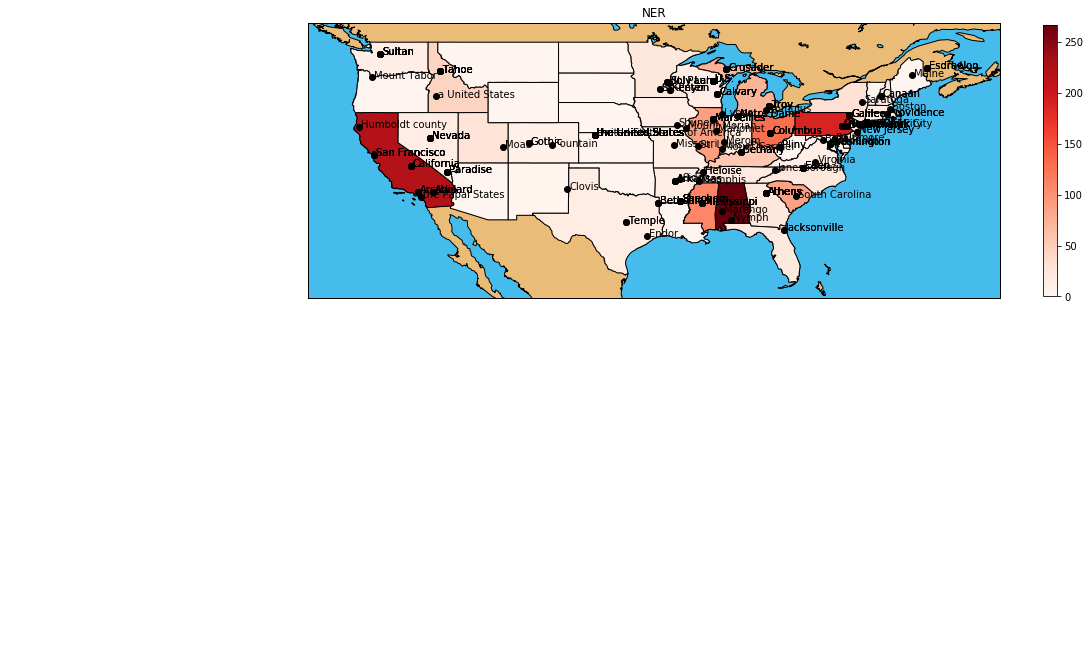

In [55]:
%matplotlib inline

from scripts.choropleth import us_choropleth

us_choropleth(geo_tab1)